In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [2]:
# Setup the figures
execfile('../code/figure-setup.py')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
# Upload the fitting results for each model
# Upload the fitting results for each model
bat_casey = pd.read_csv('../data/bat-agn-c12-params.csv', index_col=0)

bat_decompir = pd.read_csv('../data/bat-agn-decompir-params.csv', index_col=0)
bat_dale14 = pd.read_csv('../data/bat-agn-d14-params.csv', index_col=0)

# Remove 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622','Mrk3'])
bat_casey = bat_casey.drop(bad_sources)
bat_decompir = bat_decompir.drop(bad_sources)
bat_dale14 = bat_dale14.drop(bad_sources[:-1])

# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

In [4]:
# Combine the total IR luminosities into one DataFrame
bat_lir = pd.DataFrame(index=bat_casey.index)
bat_lir['LAGNC12'] = bat_casey['lir_agn']
bat_lir['LAGNC12_err_up'] = bat_casey['lir_agn_err_high']
bat_lir['LAGNC12_err_down'] = bat_casey['lir_agn_err_low']
bat_lir['LAGNC12_flag'] = bat_casey['lir_agn_flag']
bat_lir['LAGNDecompIR'] = bat_decompir['lir_agn']
bat_lir['LAGNDecompIR_err_up'] = bat_decompir['lir_agn_err_high']
bat_lir['LAGNDecompIR_err_down'] = bat_decompir['lir_agn_err_low']
bat_lir['LAGNDecompIR_flag'] = bat_decompir['lir_agn_flag']
bat_lir['LAGND14'] = bat_dale14['lir_agn']
bat_lir['LAGND14_err_up'] = bat_dale14['lir_agn_err_high']
bat_lir['LAGND14_err_down'] = bat_dale14['lir_agn_err_low']
bat_lir['LAGND14_flag'] = bat_dale14['lir_agn_flag']

bat_lir.loc['2MASXiJ1802473-145454', 'LAGNDecompIR'] = bat_lir.loc['2MASXiJ1802473-145454', 'LAGNDecompIR'] + 2.046
bat_lir.loc['2MASXiJ1802473-145454', 'LAGND14'] = bat_lir.loc['2MASXiJ1802473-145454', 'LAGND14'] + 2.046

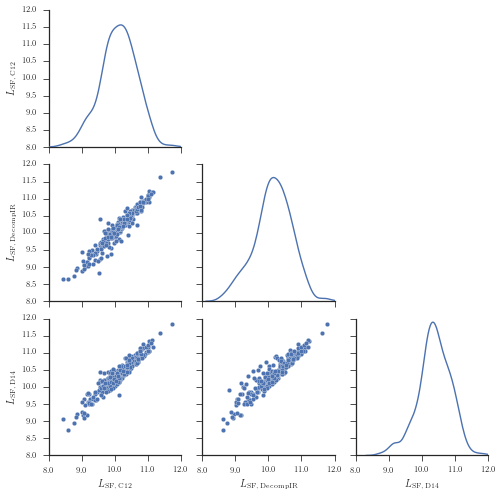

In [14]:
# Plot the correlation between each LIR using seaborn's pairplot method
g = sn.pairplot(bat_lir, diag_kind="kde", size=textwidth/3., aspect=1.)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

for i,ax in enumerate(g.axes[-1,:]):
    if i == 0:
        ax.xaxis.set_label_text(r'$L_{\rm SF,\,C12}$')
    elif i == 1:
        ax.xaxis.set_label_text(r'$L_{\rm SF,\,DecompIR}$')
    elif i == 2:
        ax.xaxis.set_label_text(r'$L_{\rm SF,\,D14}$')
    ax.set_xlim(8.0, 12.0)    
    ax.xaxis.set_ticks([8.0, 9.0, 10.0, 11.0, 12.0])
    ax.xaxis.set_ticklabels(['8.0', '9.0', '10.0', '11.0', '12.0'])

for i,ax in enumerate(g.axes[:,0]):
    if i == 0:
        ax.yaxis.set_label_text(r'$L_{\rm SF,\,C12}$')
        #ax.yaxis.set_ticklabels([])
    elif i == 1:
        ax.yaxis.set_label_text(r'$L_{\rm SF,\,DecompIR}$')
    elif i == 2:
        ax.yaxis.set_label_text(r'$L_{\rm SF,\,D14}$')
    ax.set_ylim(8.0, 12.0)
#        if j == 0:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,C12}$')          
#        if j == 1:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,DecompIR}$')
#        if j == 2:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,D14}$')
g.fig.savefig(figsave_dir+'lsf_total-comparison.pdf', bbox_inches='tight')

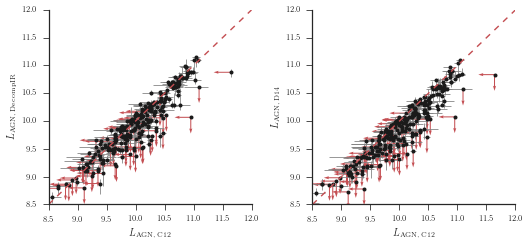

In [5]:
fig = plt.figure(figsize=(1.2*textwidth, 1/2.*textwidth))
ind1 = (bat_lir['LAGNC12_flag'] == 0) & (bat_lir['LAGNDecompIR_flag'] == 0)
ind2 = (bat_lir['LAGNC12_flag'] == -1) & (bat_lir['LAGNDecompIR_flag'] == 0)
ind3 = (bat_lir['LAGNC12_flag'] == 0) & (bat_lir['LAGNDecompIR_flag'] == -1)
ind4 = (bat_lir['LAGNC12_flag'] == -1) & (bat_lir['LAGNDecompIR_flag'] == -1)

ax1 = fig.add_subplot(121)
ax1.errorbar(bat_lir['LAGNC12'][ind1], bat_lir['LAGNDecompIR'][ind1],
             xerr=np.vstack([bat_lir['LAGNC12_err_down'][ind1], bat_lir['LAGNC12_err_up'][ind1]]),
             yerr=np.vstack([bat_lir['LAGNDecompIR_err_down'][ind1], bat_lir['LAGNDecompIR_err_up'][ind1]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax1.errorbar(bat_lir['LAGNC12'][ind2], bat_lir['LAGNDecompIR'][ind2],
             yerr=np.vstack([bat_lir['LAGNDecompIR_err_down'][ind2], bat_lir['LAGNDecompIR_err_up'][ind2]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax1.quiver(bat_lir['LAGNC12'][ind2], bat_lir['LAGNDecompIR'][ind2], -np.ones(sum(ind2)), np.zeros(sum(ind2)),
           scale_units='width', scale=12, units='height', width=0.005, color='r', pivot='tail')
ax1.errorbar(bat_lir['LAGNC12'][ind3], bat_lir['LAGNDecompIR'][ind3],
             xerr=np.vstack([bat_lir['LAGNC12_err_down'][ind3], bat_lir['LAGNC12_err_up'][ind3]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax1.quiver(bat_lir['LAGNC12'][ind3], bat_lir['LAGNDecompIR'][ind3], np.zeros(sum(ind3)), -np.ones(sum(ind3)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax1.plot(bat_lir['LAGNC12'][ind4], bat_lir['LAGNDecompIR'][ind4], 'ko', ms=4)
ax1.quiver(bat_lir['LAGNC12'][ind4], bat_lir['LAGNDecompIR'][ind4], np.zeros(sum(ind4)), -np.ones(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax1.quiver(bat_lir['LAGNC12'][ind4], bat_lir['LAGNDecompIR'][ind4], -np.ones(sum(ind4)), np.zeros(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax1.set_xlabel(r'$L_{\rm AGN,\,C12}$')
ax1.set_ylabel(r'$L_{\rm AGN,\,DecompIR}$')
ax1.plot(np.arange(8.5, 12.0, 0.001), np.arange(8.5, 12.0, 0.001), 'r--')
ax1.set_xlim(8.5, 12.0)
ax1.set_ylim(8.5, 12.0)

ind1 = (bat_lir['LAGNC12_flag'] == 0) & (bat_lir['LAGND14_flag'] == 0)
ind2 = (bat_lir['LAGNC12_flag'] == -1) & (bat_lir['LAGND14_flag'] == 0)
ind3 = (bat_lir['LAGNC12_flag'] == 0) & (bat_lir['LAGND14_flag'] == -1)
ind4 = (bat_lir['LAGNC12_flag'] == -1) & (bat_lir['LAGND14_flag'] == -1)

ax2 = fig.add_subplot(122)
ax2.errorbar(bat_lir['LAGNC12'][ind1], bat_lir['LAGND14'][ind1],
             xerr=np.vstack([bat_lir['LAGNC12_err_down'][ind1], bat_lir['LAGNC12_err_up'][ind1]]),
             yerr=np.vstack([bat_lir['LAGND14_err_down'][ind1], bat_lir['LAGND14_err_up'][ind1]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax2.errorbar(bat_lir['LAGNC12'][ind2], bat_lir['LAGND14'][ind2],
             yerr=np.vstack([bat_lir['LAGND14_err_down'][ind2], bat_lir['LAGND14_err_up'][ind2]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax2.quiver(bat_lir['LAGNC12'][ind2], bat_lir['LAGND14'][ind2], -np.ones(sum(ind2)), np.zeros(sum(ind2)),
           scale_units='width', scale=12, units='height', width=0.005, color='r', pivot='tail')
ax2.errorbar(bat_lir['LAGNC12'][ind3], bat_lir['LAGND14'][ind3],
             xerr=np.vstack([bat_lir['LAGNC12_err_down'][ind3], bat_lir['LAGNC12_err_up'][ind3]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax2.quiver(bat_lir['LAGNC12'][ind3], bat_lir['LAGND14'][ind3], np.zeros(sum(ind3)), -np.ones(sum(ind3)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax2.plot(bat_lir['LAGNC12'][ind4], bat_lir['LAGND14'][ind4], 'ko', ms=4)
ax2.quiver(bat_lir['LAGNC12'][ind4], bat_lir['LAGND14'][ind4], np.zeros(sum(ind4)), -np.ones(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax2.quiver(bat_lir['LAGNC12'][ind4], bat_lir['LAGND14'][ind4], -np.ones(sum(ind4)), np.zeros(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax2.set_xlabel(r'$L_{\rm AGN,\,C12}$')
ax2.set_ylabel(r'$L_{\rm AGN,\,D14}$')
ax2.plot(np.arange(8.5, 12.0, 0.001), np.arange(8.5, 12.0, 0.001), 'r--')
ax2.set_xlim(8.5, 12.0)
ax2.set_ylim(8.5, 12.0)
fig.subplots_adjust(wspace=0.3)
sn.despine()
fig.savefig(figsave_dir+'lir_agn-comparison_nokde.pdf', bbox_inches='tight')

Notes:
Need to change the axis labels [DONE]
Need to adjust the line-width and marker sizes [no need to]
Need to adjust tick labels especially for x-axis [DONE]

In [26]:
bat_lir[np.isnan(bat_lir['LAGNC12_flag'])]

,LAGNC12,LAGNC12_err_up,LAGNC12_err_down,LAGNC12_flag,LAGNDecompIR,LAGNDecompIR_err_up,LAGNDecompIR_err_down,LAGNDecompIR_flag,LAGND14,LAGND14_err_up,LAGND14_err_down,LAGND14_flag
Name,,,,,,,,,,,,
2MASXJ23272195+1524375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3C111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3C120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HB890241+622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mrk3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PICTORA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PKS2331-240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Analysis
bat_lir['LAGNC12'][(bat_lir['LAGNC12_flag'] == 0) | (bat_lir['LAGNC12_flag'] == -1)].describe()

count    271.000000
mean       9.987935
std        0.596700
min        7.859973
25%        9.644486
50%       10.042502
75%       10.421222
max       11.638534
Name: LAGNC12, dtype: float64

In [7]:
bat_lir['LAGNDecompIR'][(bat_lir['LAGNC12_flag'] == 0) | (bat_lir['LAGNC12_flag'] == -1)].describe()

count    271.000000
mean       9.901709
std        0.583778
min        7.971710
25%        9.531398
50%        9.916453
75%       10.282052
max       11.147467
Name: LAGNDecompIR, dtype: float64

In [8]:
bat_lir['LAGND14'][(bat_lir['LAGNC12_flag'] == 0) | (bat_lir['LAGNC12_flag'] == -1)].describe()

count    271.000000
mean       9.845010
std        0.571907
min        7.837036
25%        9.469063
50%        9.851989
75%       10.240115
max       11.091848
Name: LAGND14, dtype: float64

In [9]:
ind1 = (bat_lir['LAGNC12_flag'] == 0) | (bat_lir['LAGNC12_flag'] == -1)
(bat_lir['LAGNC12'] - bat_lir['LAGNDecompIR'])[ind1].describe()

count    271.000000
mean       0.086226
std        0.201700
min       -0.337033
25%       -0.051792
50%        0.035744
75%        0.188135
max        0.884907
dtype: float64

In [10]:
ind1 = (bat_lir['LAGNC12_flag'] == 0) | (bat_lir['LAGNC12_flag'] == -1)
(bat_lir['LAGNC12'] - bat_lir['LAGND14'])[ind1].describe()

count    271.000000
mean       0.142925
std        0.197179
min       -0.213709
25%        0.002752
50%        0.096821
75%        0.234805
max        0.877248
dtype: float64

In [50]:
(bat_lir['LAGND14'] - bat_lir['LAGNDecompIR'])[ind1].describe()

count    271.000000
mean      -0.056699
std        0.130616
min       -0.424867
25%       -0.129004
50%       -0.058473
75%        0.005957
max        0.603638
dtype: float64